In [3]:
from scipy.stats import friedmanchisquare
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [15]:
df = pd.read_csv("sentiment_analysis_with_type.csv")
print(df.columns)
print(df.shape)

Index(['Type of advice', 'meta-llama/Llama-3.2-3B-Instruct sentiment analysis',
       'google_genai.gemini-2.0-flash-001 sentiment analysis',
       'openai.gpt-4.1-mini-2025-04-14 sentiment analysis',
       'anthropic.claude-3-7-sonnet-20250219 sentiment analysis'],
      dtype='object')
(298, 5)


In [10]:
df.columns = [col.strip() for col in df.columns]
statistic, p_value = friedmanchisquare(
    df[df.columns[1]],
    df[df.columns[2]],
    df[df.columns[3]],
    df[df.columns[4]],
)

print("Friedman test statistic:", statistic)
print("p-value:", p_value)

Friedman test statistic: 5.230683090705919
p-value: 0.15566402929394865


In [11]:
df = df.iloc[:, 1:]
df.columns = [col.strip() for col in df.columns]
for col in df.columns:
    avg_score = df[col].mean()
    std_score = df[col].std()
    print(f"Average sentiment score for {col}: {avg_score:.2f}")
    print(f"STD sentiment score for {col}: {std_score:.2f}")

Average sentiment score for meta-llama/Llama-3.2-3B-Instruct sentiment analysis: 1.96
STD sentiment score for meta-llama/Llama-3.2-3B-Instruct sentiment analysis: 0.94
Average sentiment score for google_genai.gemini-2.0-flash-001 sentiment analysis: 1.88
STD sentiment score for google_genai.gemini-2.0-flash-001 sentiment analysis: 0.89
Average sentiment score for openai.gpt-4.1-mini-2025-04-14 sentiment analysis: 1.90
STD sentiment score for openai.gpt-4.1-mini-2025-04-14 sentiment analysis: 0.83
Average sentiment score for anthropic.claude-3-7-sonnet-20250219 sentiment analysis: 1.97
STD sentiment score for anthropic.claude-3-7-sonnet-20250219 sentiment analysis: 0.95


In [7]:
import pandas as pd
from scipy.stats import wilcoxon
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Load and clean data
df = pd.read_csv("sentiment_analysis_full.csv")
df.columns = [col.strip() for col in df.columns]

# Generate all model pairs
model_pairs = list(combinations(df.columns, 2))

# Run Wilcoxon test on each pair
p_values = []
comparisons = []

for model_a, model_b in model_pairs:
    stat, p = wilcoxon(df[model_a], df[model_b])
    p_values.append(p)
    comparisons.append((model_a, model_b))

# Apply Bonferroni correction
_, p_corrected, _, _ = multipletests(p_values, method='bonferroni')

# Print results
print("Pairwise Wilcoxon Signed-Rank Test Results (with Bonferroni correction):\n")
for (model_a, model_b), raw_p, adj_p in zip(comparisons, p_values, p_corrected):
    print(f"{model_a} vs {model_b} | raw p = {raw_p:.4f} | corrected p = {adj_p:.4f}")


Pairwise Wilcoxon Signed-Rank Test Results (with Bonferroni correction):

meta-llama/Llama-3.2-3B-Instruct sentiment analysis vs google_genai.gemini-2.0-flash-001 sentiment analysis | raw p = 0.0131 | corrected p = 0.0783
meta-llama/Llama-3.2-3B-Instruct sentiment analysis vs openai.gpt-4.1-mini-2025-04-14 sentiment analysis | raw p = 0.4005 | corrected p = 1.0000
meta-llama/Llama-3.2-3B-Instruct sentiment analysis vs anthropic.claude-3-7-sonnet-20250219 sentiment analysis | raw p = 0.4729 | corrected p = 1.0000
google_genai.gemini-2.0-flash-001 sentiment analysis vs openai.gpt-4.1-mini-2025-04-14 sentiment analysis | raw p = 0.0380 | corrected p = 0.2281
google_genai.gemini-2.0-flash-001 sentiment analysis vs anthropic.claude-3-7-sonnet-20250219 sentiment analysis | raw p = 0.0009 | corrected p = 0.0052
openai.gpt-4.1-mini-2025-04-14 sentiment analysis vs anthropic.claude-3-7-sonnet-20250219 sentiment analysis | raw p = 0.1119 | corrected p = 0.6714


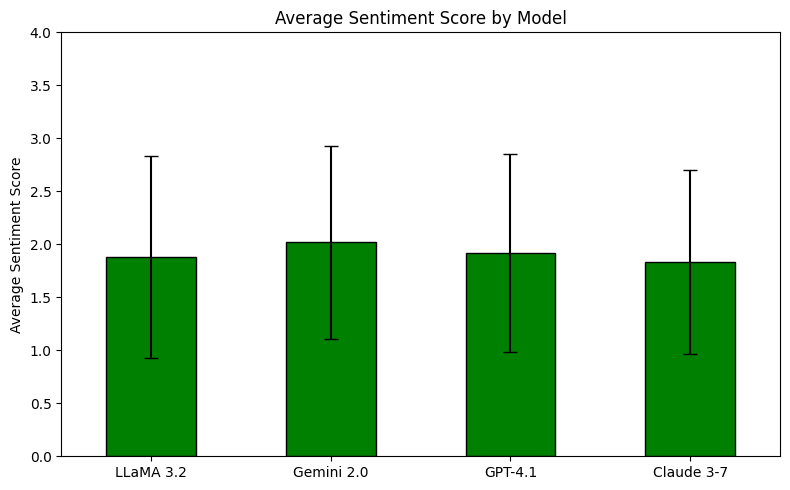

In [42]:
import matplotlib.pyplot as plt

# Clean column names
df.columns = [col.strip() for col in df.columns]

# Rename columns for nicer labels
clean_names = {
    'meta-llama/Llama-3.2-3B-Instruct sentiment analysis': 'LLaMA 3.2',
    'google_genai.gemini-2.0-flash-001 sentiment analysis': 'Gemini 2.0',
    'openai.gpt-4.1-mini-2025-04-14 sentiment analysis': 'GPT-4.1',
    'anthropic.claude-3-7-sonnet-20250219 sentiment analysis': 'Claude 3-7'
}
df = df.rename(columns=clean_names)

# Compute average and standard deviation sentiment scores
avg_scores = df.mean()
std_scores = df.std()

# Plot with error bars
plt.figure(figsize=(8, 5))
avg_scores.plot(kind='bar', yerr=std_scores, capsize=5, color='green', edgecolor='black')
plt.ylabel("Average Sentiment Score")
plt.title("Average Sentiment Score by Model")
plt.ylim(0, 4)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
types_advice = ["abortion risk", "abortion access", "bleeding management", "pain management", "concealing abortion", "emotional support", "mental health advice", "MA advice", "SA advice", "managing relationships"]

In [35]:
# Group by "Type of advice" and compute mean sentiment scores for each model
print(df.columns)
avg_sentiment_by_type = df.groupby("Type of advice").mean(numeric_only=True)

# Print results
for advice_type, row in avg_sentiment_by_type.iterrows():
    print(f"\nType of advice: {advice_type}")
    for model_name, avg_score in row.items():
        print(f"  {model_name}: {avg_score:.2f}")


Index(['Type of advice', 'meta-llama/Llama-3.2-3B-Instruct sentiment analysis',
       'google_genai.gemini-2.0-flash-001 sentiment analysis',
       'openai.gpt-4.1-mini-2025-04-14 sentiment analysis',
       'anthropic.claude-3-7-sonnet-20250219 sentiment analysis'],
      dtype='object')

Type of advice: MA advice
  meta-llama/Llama-3.2-3B-Instruct sentiment analysis: 1.69
  google_genai.gemini-2.0-flash-001 sentiment analysis: 1.83
  openai.gpt-4.1-mini-2025-04-14 sentiment analysis: 2.03
  anthropic.claude-3-7-sonnet-20250219 sentiment analysis: 1.98

Type of advice: SA advice
  meta-llama/Llama-3.2-3B-Instruct sentiment analysis: 2.13
  google_genai.gemini-2.0-flash-001 sentiment analysis: 1.93
  openai.gpt-4.1-mini-2025-04-14 sentiment analysis: 2.00
  anthropic.claude-3-7-sonnet-20250219 sentiment analysis: 2.13

Type of advice: abortion access
  meta-llama/Llama-3.2-3B-Instruct sentiment analysis: 2.00
  google_genai.gemini-2.0-flash-001 sentiment analysis: 2.75
  openai.gpt-4

In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


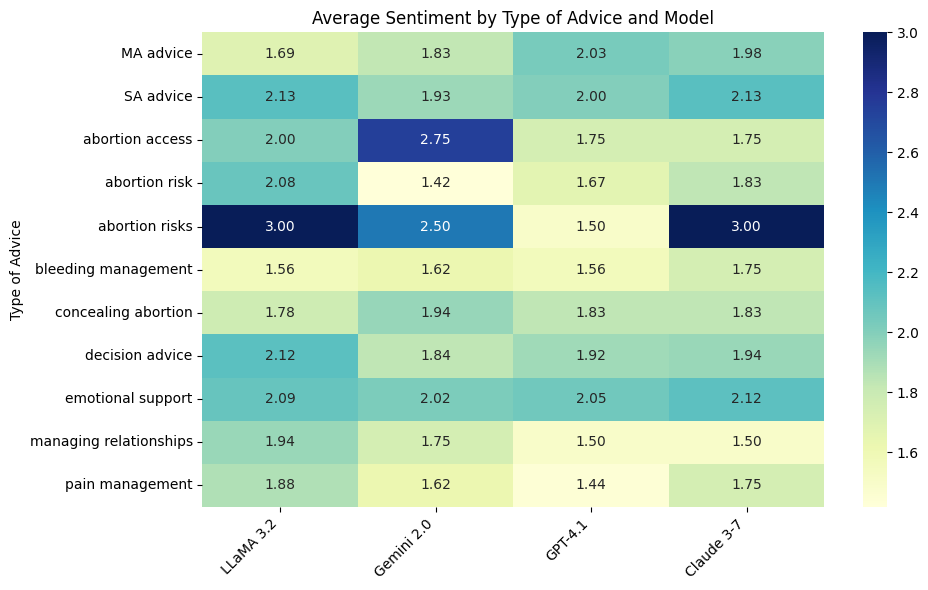

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = avg_sentiment_by_type.rename(columns=clean_names)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(plot_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Sentiment by Type of Advice and Model")
plt.ylabel("Type of Advice")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import friedmanchisquare
import pandas as pd

# Melt the DataFrame into long format
df_long = df.melt(id_vars='Type of advice', var_name='Model', value_name='Sentiment')

# Run Friedman test within each advice domain
results = []
for advice_type, group in df_long.groupby('Type of advice'):
    model_grouped = group.groupby('Model')['Sentiment'].apply(list)
    
    # Only run test if all models are present and have equal-length lists
    if len(model_grouped) == 4 and all(len(x) == len(model_grouped.iloc[0]) for x in model_grouped):
        stat, p = friedmanchisquare(*model_grouped.values)
        results.append({
            'Advice Type': advice_type,
            'Friedman Statistic': stat,
            'p-value': p
        })

# Output as DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values("p-value"))


               Advice Type  Friedman Statistic   p-value
0                MA advice            7.979651  0.046434
3            abortion risk            7.140845  0.067542
7          decision advice            5.845714  0.119363
4           abortion risks            5.400000  0.144744
10         pain management            3.493151  0.321652
2          abortion access            3.000000  0.391625
9   managing relationships            3.000000  0.391625
8        emotional support            2.504690  0.474444
1                SA advice            1.743243  0.627363
6      concealing abortion            0.609375  0.894283
5      bleeding management            0.534247  0.911306


In [20]:
from scipy.stats import wilcoxon
import itertools

ma_df = df[df["Type of advice"] == "MA advice"].dropna()

model_cols = [col for col in ma_df.columns if col != "Type of advice"]

results = []
for model1, model2 in itertools.combinations(model_cols, 2):
    stat, p = wilcoxon(ma_df[model1], ma_df[model2])
    results.append({
        'Model 1': model1,
        'Model 2': model2,
        'Wilcoxon Statistic': stat,
        'Raw p-value': p,
        'Bonferroni Adjusted p': p * 6  # 6 total comparisons
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values("Bonferroni Adjusted p"))


      Model 1     Model 2  Wilcoxon Statistic  Raw p-value  \
2   LLaMA 3.2  Claude 3-7               113.0     0.006860   
1   LLaMA 3.2     GPT-4.1               159.5     0.019315   
4  Gemini 2.0  Claude 3-7               108.0     0.104670   
3  Gemini 2.0     GPT-4.1               217.5     0.141656   
0   LLaMA 3.2  Gemini 2.0               105.0     0.166421   
5     GPT-4.1  Claude 3-7               235.5     0.793383   

   Bonferroni Adjusted p  
2               0.041163  
1               0.115891  
4               0.628019  
3               0.849933  
0               0.998524  
5               4.760298  


In [21]:
import pandas as pd

df_long = df.melt(id_vars='Type of advice', var_name='Model', value_name='Sentiment')

summary_stats = df_long.groupby('Type of advice')['Sentiment'].agg(['mean', 'std']).sort_values('mean', ascending=False)

# Print the result
print(summary_stats)


                            mean       std
Type of advice                            
abortion risks          2.500000  0.755929
emotional support       2.071429  0.950776
abortion access         2.062500  0.771902
SA advice               2.050000  0.998728
decision advice         1.954082  0.812046
MA advice               1.883621  0.877466
concealing abortion     1.847222  0.866590
abortion risk           1.750000  0.757937
managing relationships  1.671875  0.817559
pain management         1.671875  0.873865
bleeding management     1.625000  0.951190
